# Amazon Fine Food Review - TextBlob

Importing all necessary library

In [8]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
!pip install -U textblob

Requirement already up-to-date: textblob in e:\anaconda\lib\site-packages (0.15.3)


Import of Data using read_csv

In [36]:
data = pd.read_csv('C:/Users/BADRI/Desktop/ML Projects/Amazon Food Review - Sentiment Analysis using TextBlob/Reviews.csv')

In [37]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


As the number of entries are 568454, will be doing analysis only for 20000 entries

In [41]:
data = data.head(20000) # this code will select first 20000 rows only
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


In [42]:
data.dropna() # dropping of all null data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
19995,19996,B002C50X1M,A1XRXZI5KOMVDD,"KAF1958 ""amandaf0626""",0,0,4,1307664000,Crispy and tart,Deep River Salt & Vinegar chips are thick and ...
19996,19997,B002C50X1M,A7G9M0IE7LABX,Kevin,0,0,5,1307059200,Exceeded my expectations. One of the best chip...,I was very skeptical about buying a brand of c...
19997,19998,B002C50X1M,A38J5PRUDESMZF,ray,0,0,5,1305763200,"Awesome Goodness! (deep river kettle chips, sw...",Before you turn to other name brands out there...
19998,19999,B002C50X1M,A17TPOSAG43GSM,Herrick,0,0,3,1303171200,"Pretty good, but prefer other jalapeno chips","I was expecting some ""serious flavor"" as it wa..."


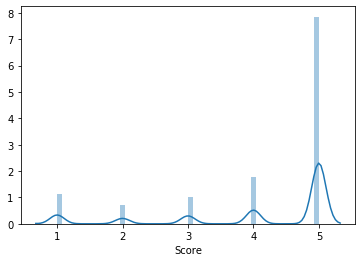

In [44]:
sns.distplot(data['Score']) # distribution plot reflects how Score or ratings are distributed
#Score 5 is high

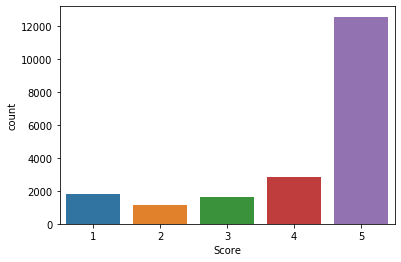

In [45]:
sns.countplot(data['Score'])

In [53]:
data['Text'][150] # this code helps in indexing and returning the required rows

"This is a fabulous marinade!  I love to use it for chicken, either baked in the oven OR on the grill.  This has enough flavor & flair, I've even used it for dinner parties, only to receive rave reviews from my guests!! DEFINITELY worth the price! Super cheap and super easy! Love it!"

In [54]:
text_blob_object = TextBlob(data['Text'][150]) # calling out text analysis for 150th row comments

In [57]:
text_blob_object.sentiment # calling out sentiment analysis for the given row
# Polarity: Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
# Subjectivity:Sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]

Sentiment(polarity=0.2734848484848485, subjectivity=0.6924242424242424)

In [60]:
# for getting polarity and subjectivity across all the text, need to define def
def find_pol(review):
    return TextBlob(review).sentiment.polarity

data['Sentiment_Polarity'] = data['Text'].apply(find_pol) 
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


In [62]:
def find_sub(review):
    return TextBlob(review).sentiment.subjectivity

data['Sentiment_Subjectivitiy'] = data['Text'].apply(find_sub)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity,Sentiment_Subjectivitiy
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000,0.433333
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333,0.762963
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571,0.448571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667,0.533333
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333,0.637500


In [64]:
data.to_csv("Sentiment.csv",index=False) # importing updated data to csv file 

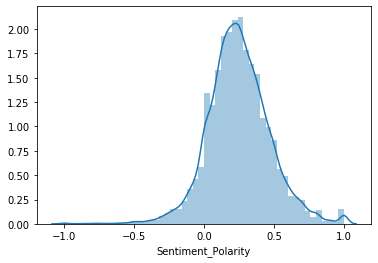

In [67]:
sns.distplot(data['Sentiment_Polarity'])
# polarity of the data majorly lies between 0.0 and 0.5 which is positive sentiment
# some of the polarity are greater then 0.5 which is highly positive.
# some o the polarity are less then 0.5 which are negative sentiment and some of the comments
# are -1 which is highly negative

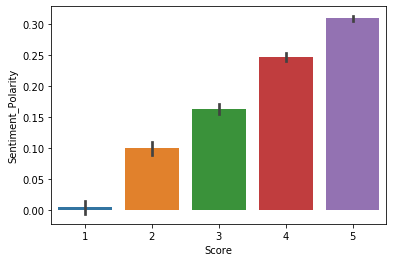

In [70]:
sns.barplot(x='Score', y='Sentiment_Polarity', data=data)

In [76]:
# most negative comments
most_negative = data[data.Sentiment_Polarity == -1].Text.head()
most_negative

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object

In [79]:
most_postive = data[data.Sentiment_Polarity == 1].Text.head()
most_postive # finding most positive comments

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object

In [81]:
data['Text'][106] # calling our respective text for the mentioned colum

"not what I was expecting in terms of the company's reputation for excellent home delivery products"

# Good Job